In [6]:
import pandas as pd
import os

# 1. 병합할 경로 지정
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/7.마케팅정보"
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_마케팅정보.parquet") for month in months]

# 2. 병합 리스트
df_list = []
for path in file_paths:
    df = pd.read_parquet(path)
    df['기준년월'] = os.path.basename(path).split('_')[0]  # 기준년월 컬럼 추가
    df_list.append(df)

# 3. 병합 수행
merged_df = pd.concat(df_list, ignore_index=True)

# 4. 결과 확인
print("병합된 데이터프레임 크기:", merged_df.shape)
print("컬럼 목록:")
print(merged_df.columns.tolist())

병합된 데이터프레임 크기: (2400000, 64)
컬럼 목록:
['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M', '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M', '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M', '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M', '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M', '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M', '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M', '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M', '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M', '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M', '컨택건수_CA_청구서_R6M', '컨택건수_리볼빙_청구서_R6M', '컨택건수_이용유도_청구서_R6M', '컨택건수

In [7]:
from sklearn.preprocessing import LabelEncoder

# 1. 복사본 생성 (원본 보존하고 싶을 경우)
encoded_df = merged_df.copy()

# 2. 문자형 컬럼을 Label Encoding
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object' or encoded_df[col].dtype.name == 'category':
        encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# 3. 확인
print("문자형 → 수치형 변환 완료")
print("변환된 데이터 타입:")
print(encoded_df.dtypes.value_counts())

문자형 → 수치형 변환 완료
변환된 데이터 타입:
int64    60
int32     4
Name: count, dtype: int64


In [8]:
# 1. 표준편차 0인 컬럼 제거
std_0_cols = encoded_df.columns[encoded_df.std() == 0].tolist()
print("표준편차 0인 컬럼:", std_0_cols)
encoded_df = encoded_df.drop(columns=std_0_cols)

# 2. 결측치 비율 30% 이상 컬럼 제거
null_ratio = encoded_df.isnull().mean()
high_null_cols = null_ratio[null_ratio > 0.3].index.tolist()
print("결측치 비율 > 30% 컬럼:", high_null_cols)
encoded_df = encoded_df.drop(columns=high_null_cols)

# 3. 결과 요약
print("✅ 정리된 컬럼 수:", encoded_df.shape[1])

표준편차 0인 컬럼: ['컨택건수_CA_TM_B0M', '컨택건수_포인트소진_TM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_카드론_인터넷_B0M', '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M', '컨택건수_CA_EM_R6M', '컨택건수_리볼빙_EM_R6M', '컨택건수_리볼빙_청구서_R6M', '컨택건수_카드론_인터넷_R6M', '컨택건수_CA_인터넷_R6M', '컨택건수_리볼빙_인터넷_R6M', '컨택건수_카드론_당사앱_R6M', '컨택건수_CA_당사앱_R6M', '컨택건수_리볼빙_당사앱_R6M', '컨택건수_FDS_B0M', '컨택건수_FDS_R6M']
결측치 비율 > 30% 컬럼: []
✅ 정리된 컬럼 수: 42


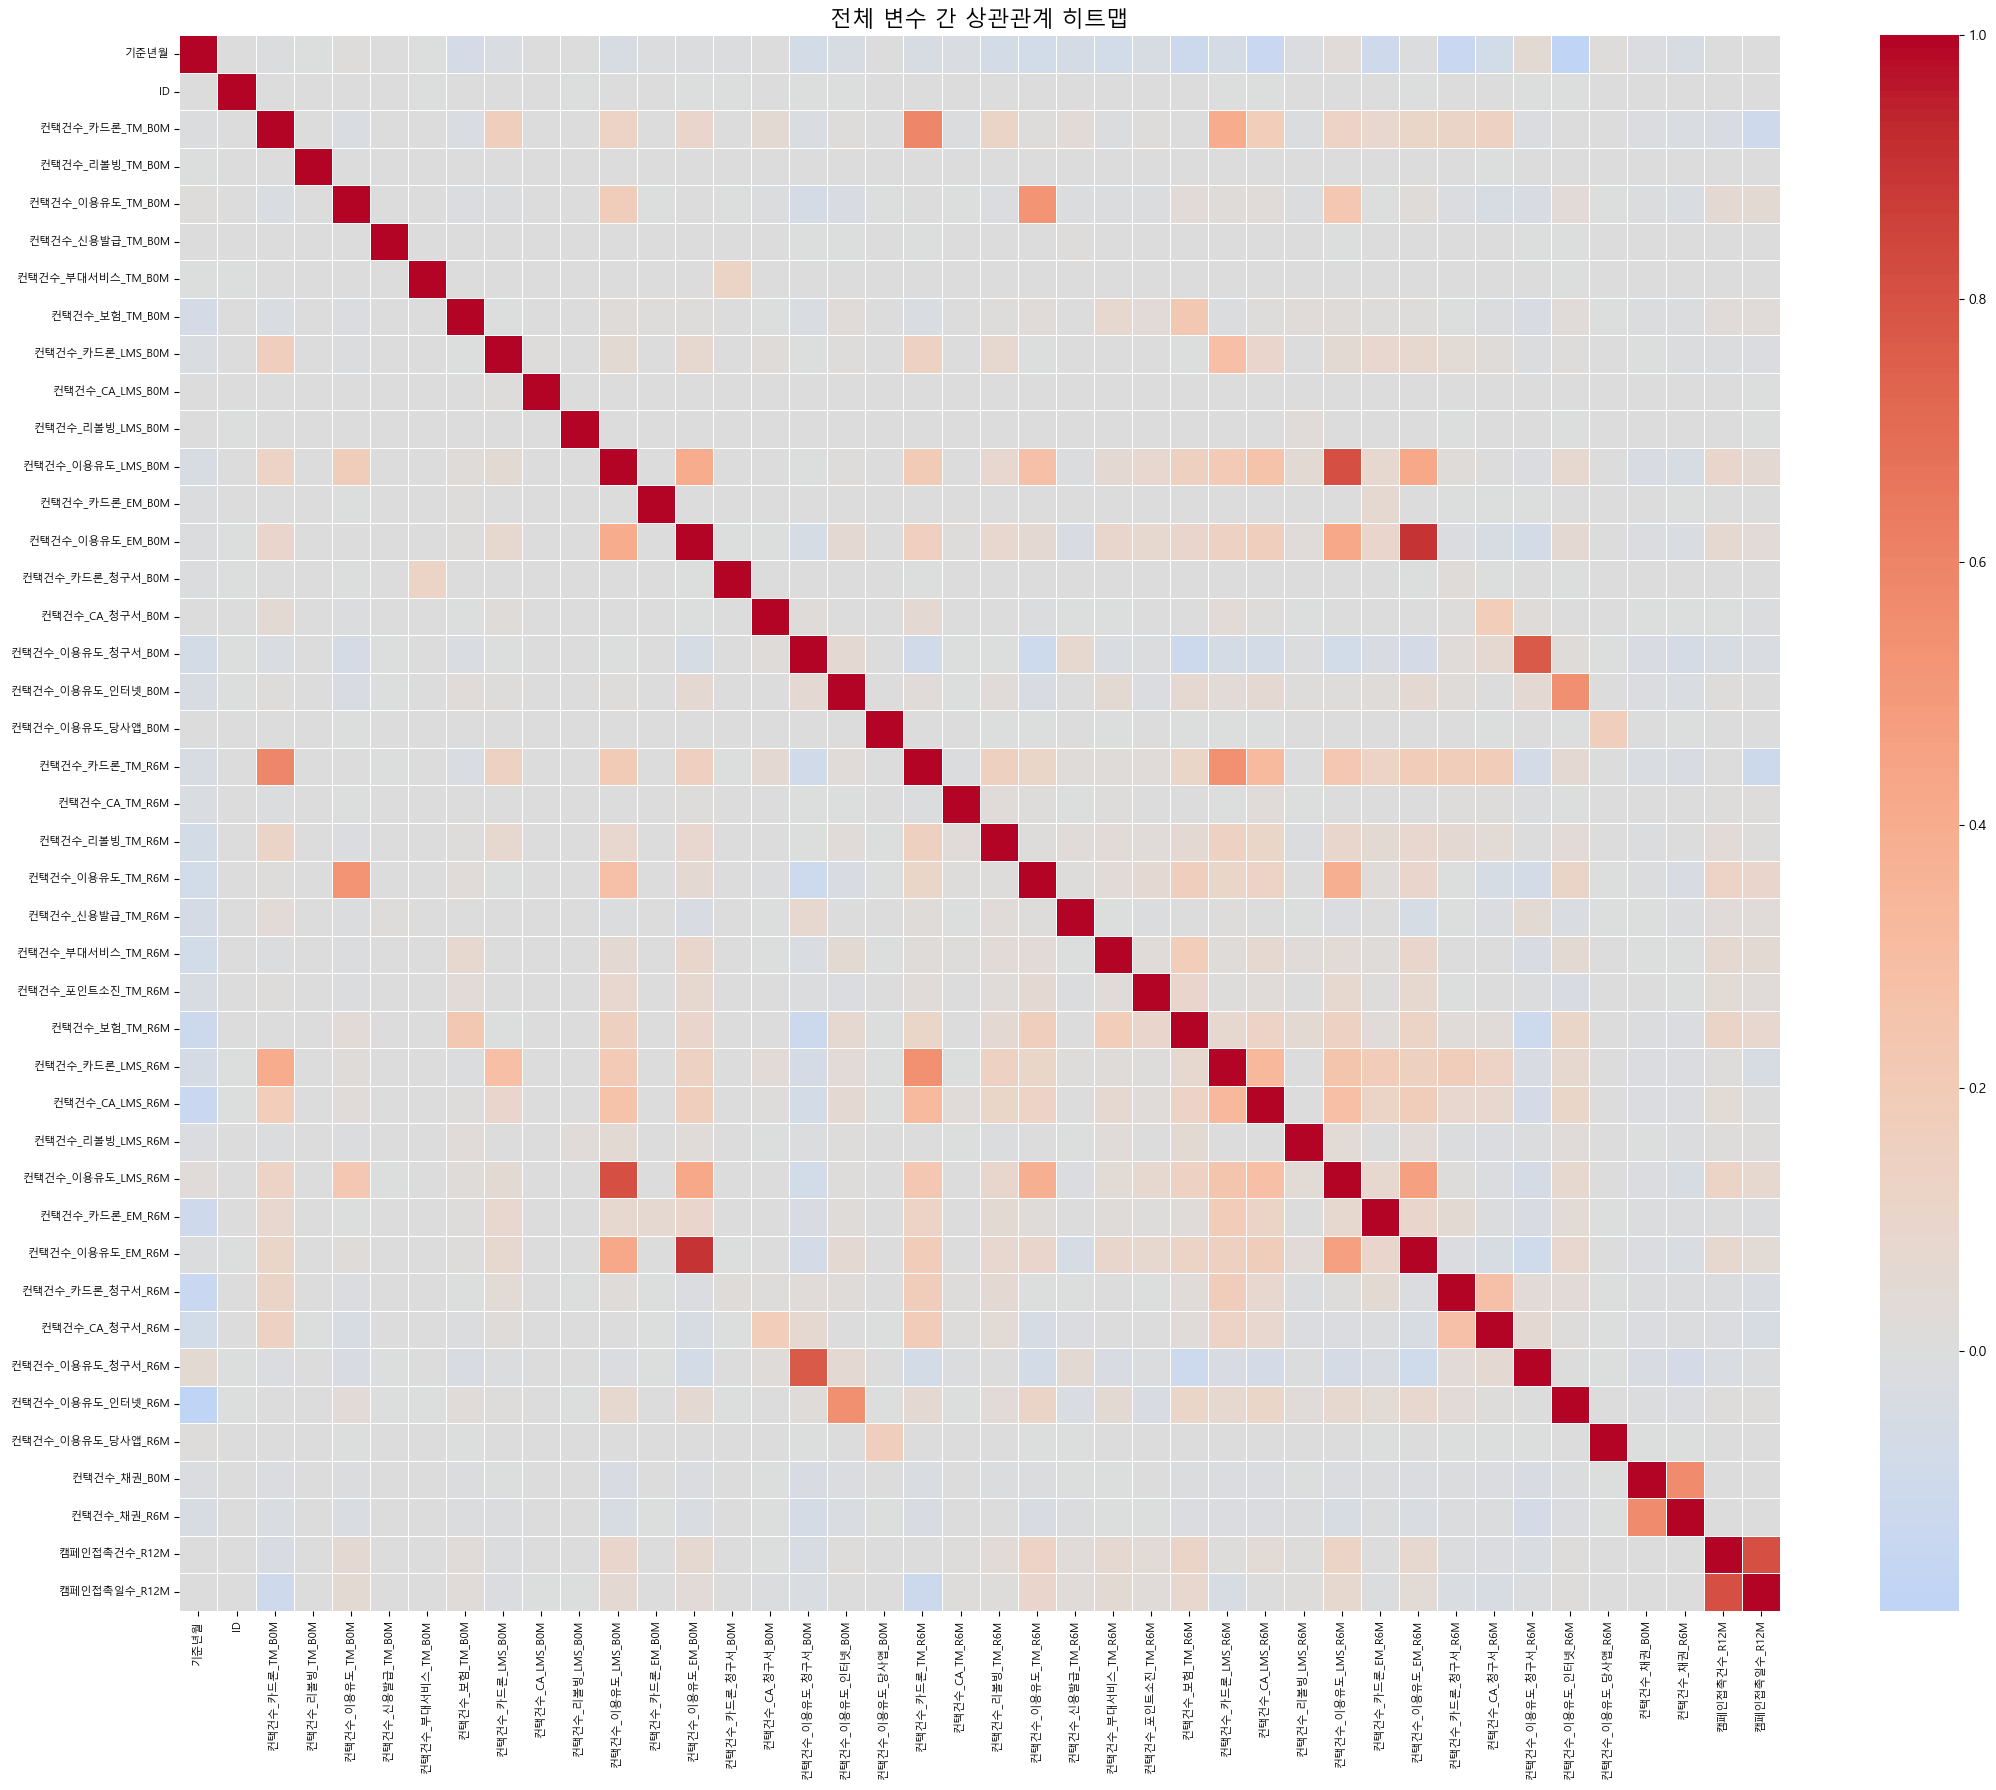

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 1. 상관계수 계산
corr_matrix = encoded_df.corr()

# 2. 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 3. 히트맵 시각화
plt.figure(figsize=(22, 18))  # 넓고 크게
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=False,
    cbar=True,
    linewidths=0.5
)

plt.title("전체 변수 간 상관관계 히트맵", fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [10]:
# 1. 절댓값 기준으로 상관계수 추출
threshold = 0.5
corr_pairs = corr_matrix.abs().unstack()

# 2. 자기 자신과의 상관 (항상 1) 제거
corr_pairs = corr_pairs[corr_pairs < 1]

# 3. 중복 쌍 제거 (A-B, B-A)
corr_pairs = corr_pairs.drop_duplicates()

# 4. 0.5 이상 필터링
strong_corr = corr_pairs[corr_pairs >= threshold].sort_values(ascending=False)

# 5. 결과 확인
print("상관계수 0.5 이상인 변수쌍 개수:", strong_corr.shape[0])
print(strong_corr)

상관계수 0.5 이상인 변수쌍 개수: 9
컨택건수_이용유도_EM_B0M   컨택건수_이용유도_EM_R6M     0.904203
캠페인접촉건수_R12M       캠페인접촉일수_R12M         0.810790
컨택건수_이용유도_LMS_B0M  컨택건수_이용유도_LMS_R6M    0.804809
컨택건수_이용유도_청구서_B0M  컨택건수_이용유도_청구서_R6M    0.768508
컨택건수_카드론_TM_B0M    컨택건수_카드론_TM_R6M      0.584260
컨택건수_채권_B0M        컨택건수_채권_R6M          0.565369
컨택건수_이용유도_인터넷_B0M  컨택건수_이용유도_인터넷_R6M    0.553915
컨택건수_카드론_TM_R6M    컨택건수_카드론_LMS_R6M     0.538849
컨택건수_이용유도_TM_B0M   컨택건수_이용유도_TM_R6M     0.525483
dtype: float64


In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 윈도우 사용자용 - Malgun Gothic 설치돼 있다고 가정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 말굿고딕 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

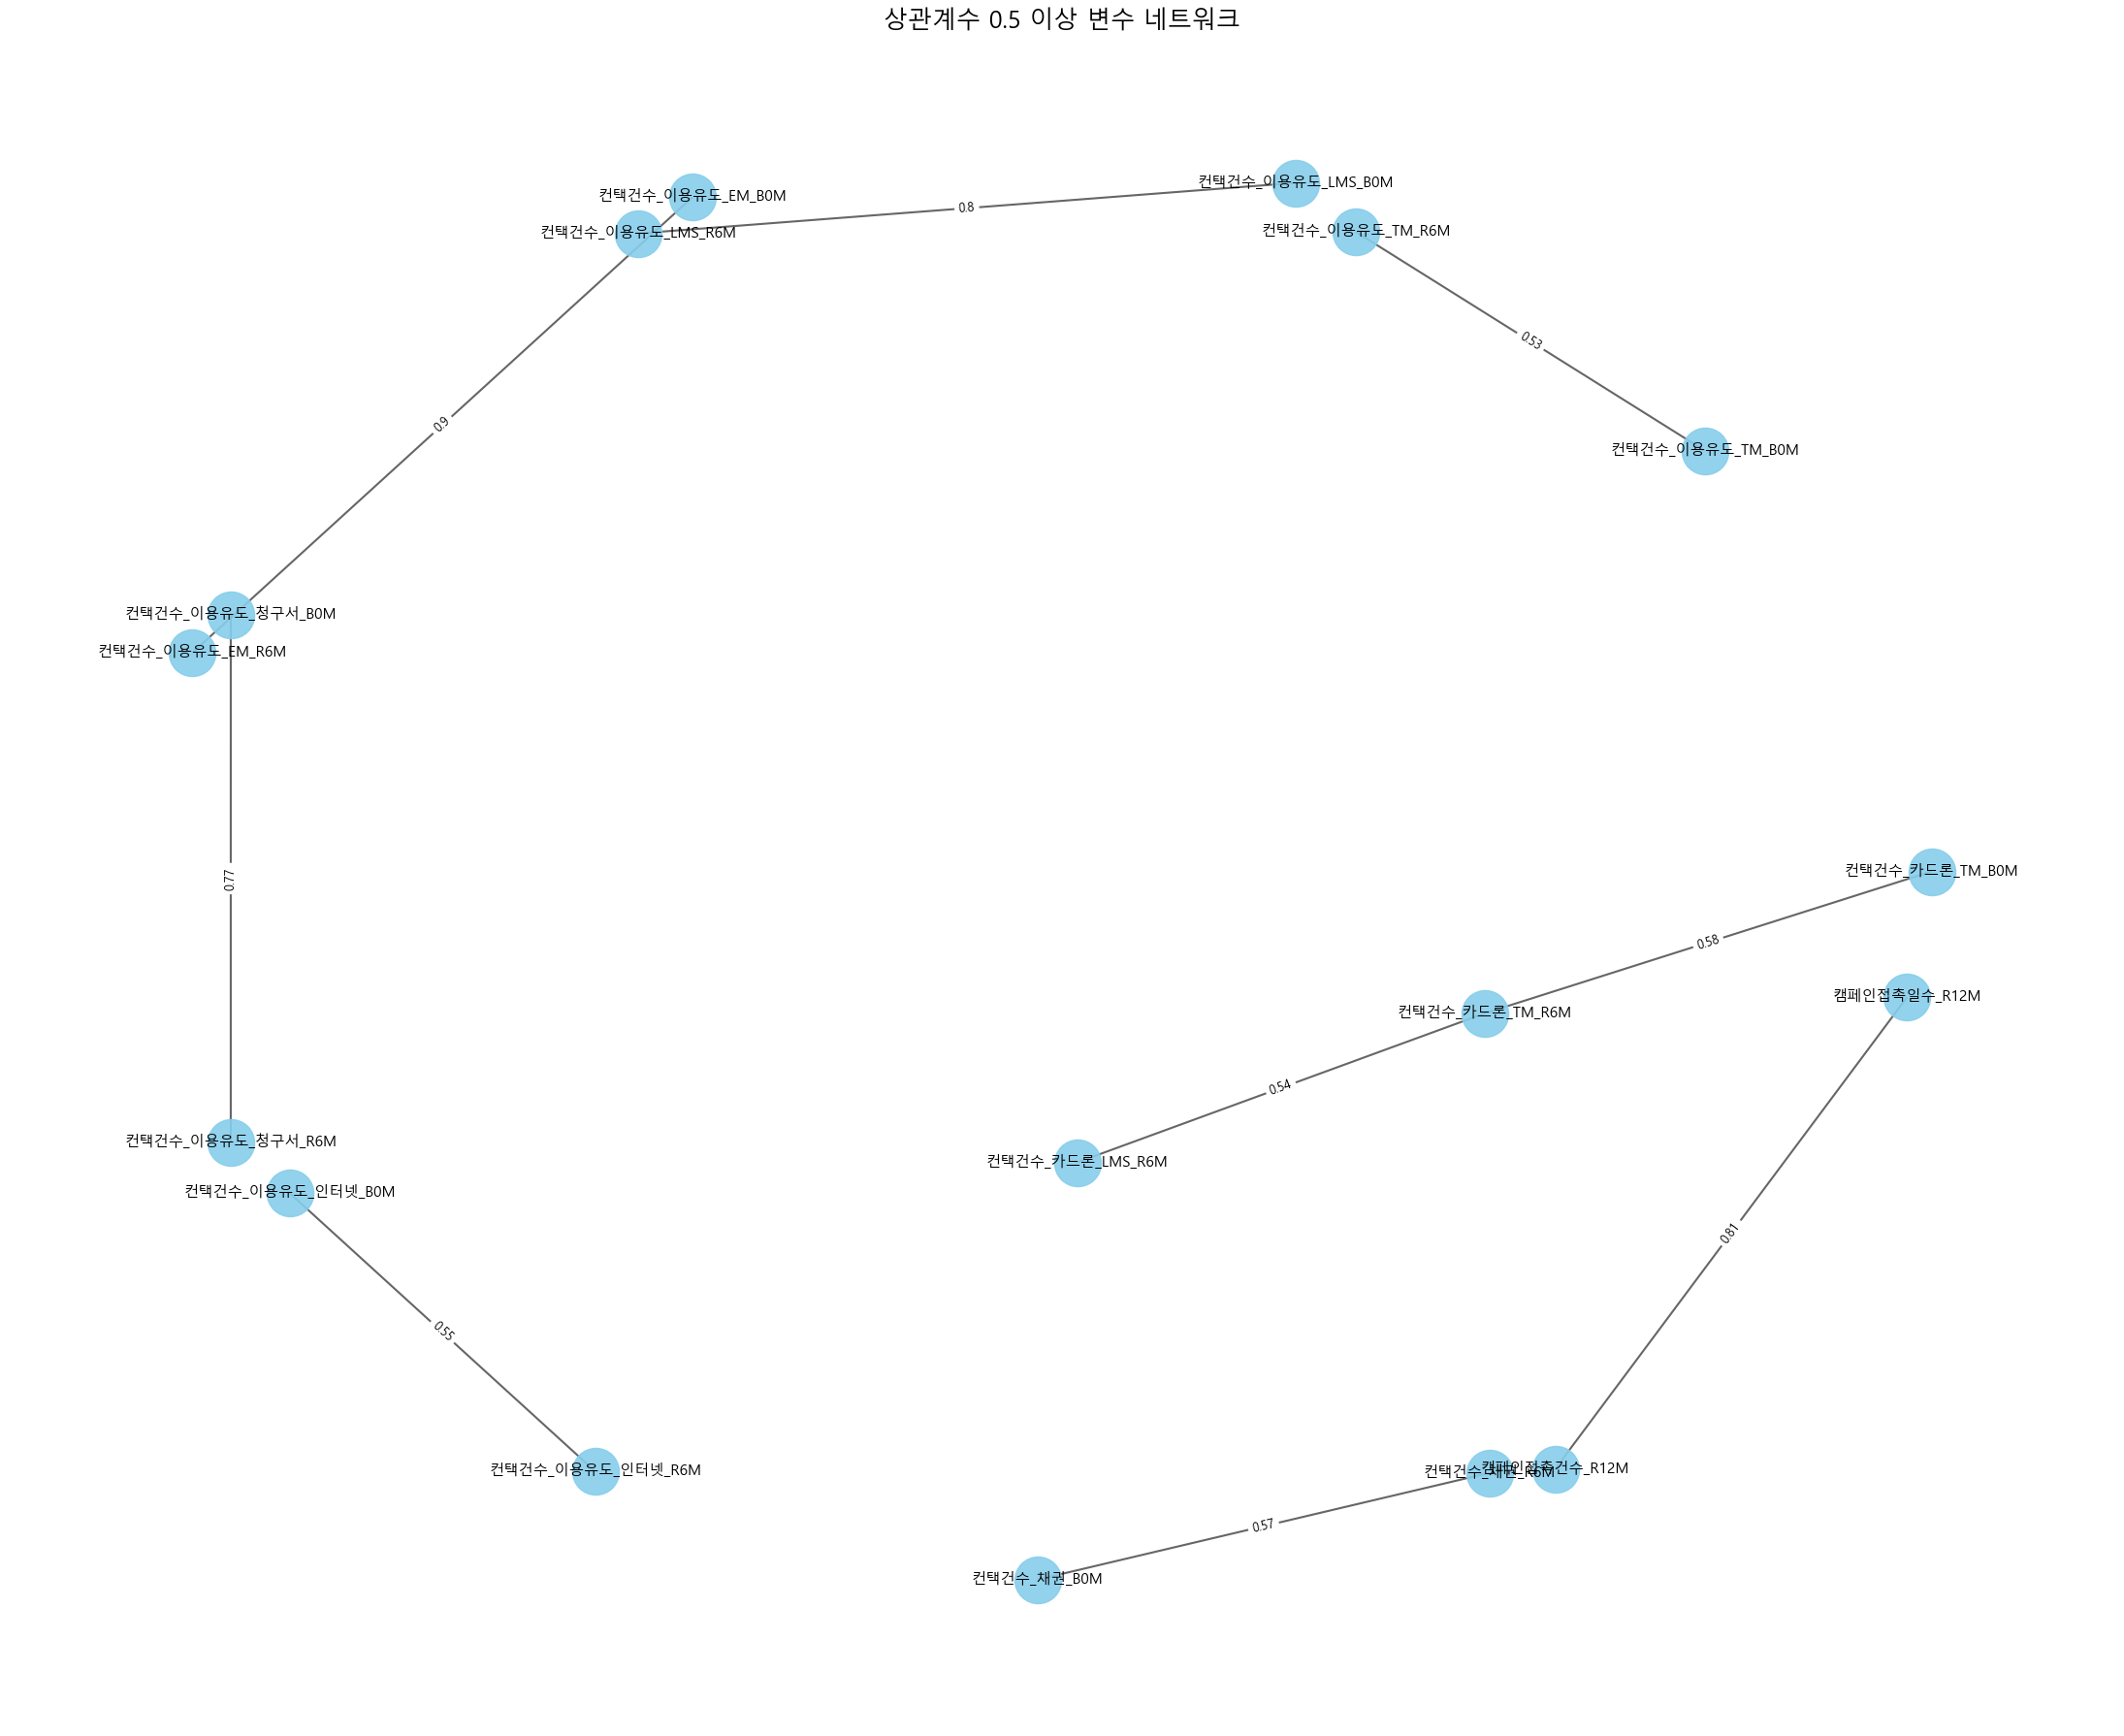

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 1. 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop
mpl.rcParams['axes.unicode_minus'] = False

# 2. 상관계수 0.5이상 페어 추출
threshold = 0.5
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()
strong_corr = corr_pairs[corr_pairs >= threshold]

# 3. 그래프 생성
G = nx.Graph()
for (var1, var2), corr in strong_corr.items():
    G.add_edge(var1, var2, weight=round(corr, 2))

# 4. 가독성 향상: 배치 조정, 폰트/간격 확대
plt.figure(figsize=(22, 18))
pos = nx.kamada_kawai_layout(G)  # 🔸 거리 기반 균형 배치

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)

# 텍스트 가독성 개선
nx.draw_networkx_labels(G, pos, font_size=11, font_family=font_prop)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family=font_prop)

plt.title("상관계수 0.5 이상 변수 네트워크", fontsize=18, fontname=font_prop)
plt.axis('off')
plt.tight_layout()
plt.show()

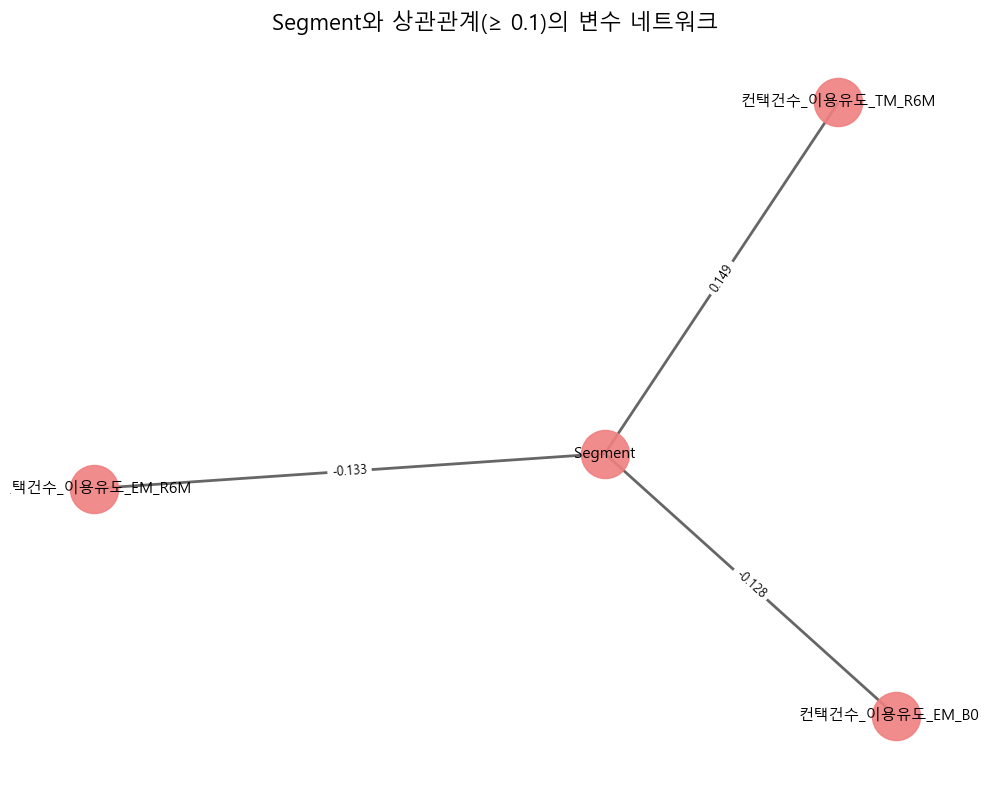

In [13]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 🔹 1. 파일 경로 리스트 설정
months = ['07', '08', '09', '10', '11', '12']

member_file_paths = [
    f"C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/2018{month}_train_회원정보.parquet"
    for month in months
]

marketing_file_paths = [
    f"C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/7.마케팅정보/2018{month}_train_마케팅정보.parquet"
    for month in months
]

# 🔹 2. 파일 불러오고 기준년월 추가 함수
def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        기준년월 = os.path.basename(path).split('_')[0]
        df['기준년월'] = 기준년월
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# 🔹 3. 파일 불러오기
member_df = load_and_merge_parquet(member_file_paths)
marketing_df = load_and_merge_parquet(marketing_file_paths)

# 🔹 4. Segment 컬럼 추출 및 숫자형 변환
segment_col_candidates = [col for col in member_df.columns if 'segment' in col.lower()]
segment_col = segment_col_candidates[-1]  # 마지막 후보 사용
if member_df[segment_col].dtype == 'object':
    member_df[segment_col] = member_df[segment_col].astype('category').cat.codes

# 🔹 5. 병합
target_cols = ['ID', '기준년월', segment_col]
member_target = member_df[target_cols]
combined_df = pd.merge(member_target, marketing_df, on=['ID', '기준년월'], how='inner')

# 🔹 6. 수치형 컬럼 선택
numeric_cols = [col for col in combined_df.select_dtypes(include=['int64', 'float64']).columns if col != segment_col]

# 🔹 7. 결측치 제거 및 상수형 제거
clean_df = combined_df[numeric_cols + [segment_col]].dropna()
clean_df = clean_df.loc[:, clean_df.std() != 0]
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

# 🔹 8. 상관계수 계산
corr_dict = {
    col: clean_df[segment_col].corr(clean_df[col])
    for col in numeric_cols
}

# 🔹 9. 결과 정리
corr_df = pd.DataFrame({
    '컬럼명': list(corr_dict.keys()),
    '상관계수': list(corr_dict.values())
})
corr_df = corr_df.sort_values(by='상관계수', key=abs, ascending=False)

# 🔹 10. 상관계수 ≥ 0.1인 변수 필터
segment_related = corr_df[corr_df['상관계수'].abs() >= 0.1].set_index('컬럼명')

# ✅ 11. 네트워크 그래프 생성 (weight는 abs로, label은 실제값 유지)
G = nx.Graph()
for var in segment_related.index:
    weight = segment_related.loc[var, '상관계수']
    G.add_edge('Segment', var, weight=abs(weight), label=round(weight, 3))

# ✅ 12. 시각화
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path).get_name()

if len(G.edges) == 0:
    print("⚠️ 상관계수 ≥ 0.1인 변수 연결이 없습니다.")
else:
    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G, weight='weight')  # layout 계산에 절댓값 사용

    nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightcoral', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=11, font_family=font_prop)

    edge_labels = nx.get_edge_attributes(G, 'label')  # 실제 상관계수 표시
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family=font_prop)

    plt.title("Segment와 상관관계(≥ 0.1)의 변수 네트워크", fontsize=16, fontname=font_prop)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
